In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Loading dataset
df = pd.read_csv('Retail(Dataset).csv')

In [6]:

# Displaying top 5 rows
df.head()



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
# Displaying bottom 5 rows
df.tail()



,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [8]:
# Dataset dimensions (rows, columns)
df.shape

(9994, 13)

In [9]:
# Summary statistics
df.describe()



,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:

# Column names
df.columns



Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
# Checking for duplicate rows
df.duplicated().sum()



17

In [13]:
# Unique values in each column
df.nunique()

,0
Ship Mode,4
Segment,3
Country,1
City,531
State,49
Postal Code,631
Region,4
Category,3
Sub-Category,17
Sales,5825


In [14]:
# Changing 'Postal Code' data type to object
df['Postal Code'] = df['Postal Code'].astype('object')

In [15]:
# Dropping duplicate rows
df.drop_duplicates(subset=None, keep='first', inplace=True)


In [16]:
# Checking again for duplicate rows
df.duplicated().sum()

0

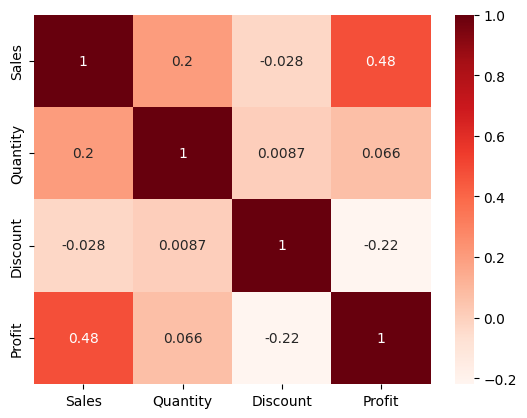

In [18]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = df_numeric.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()


In [19]:
# Check for missing values
df.isnull().sum()

# Optionally, fill missing values if found
df.fillna(0, inplace=True)  # Or drop rows/columns with missing values using df.dropna()


In [20]:
# Check data types
df.dtypes

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,object
Region,object
Category,object
Sub-Category,object
Sales,float64


In [22]:
# Dropping 'Postal Code' column as it's not needed
df = df.drop(['Postal Code'], axis=1)

,count
Ship Mode,
Standard Class,5955
Second Class,1943
First Class,1537
Same Day,542


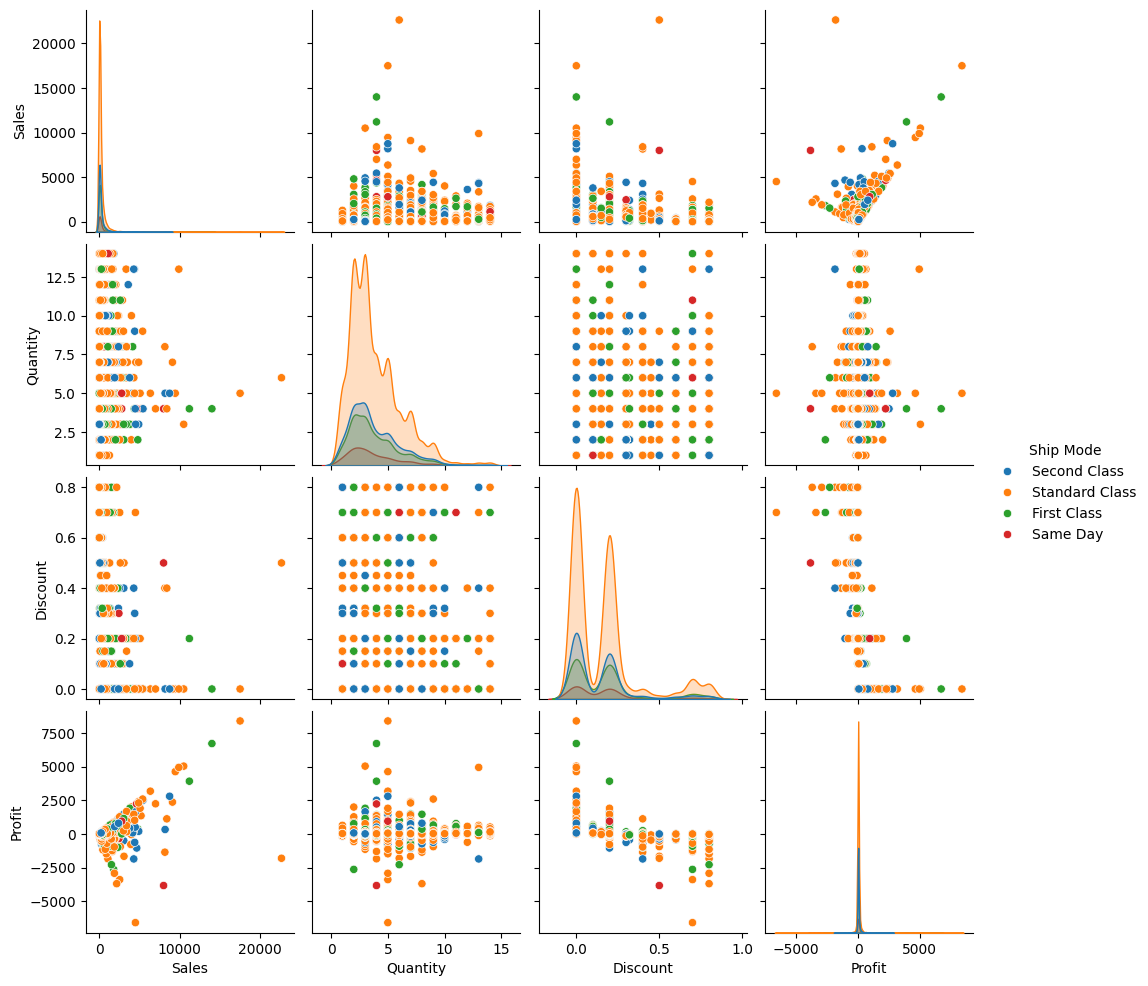

In [23]:
# Pair plot based on 'Ship Mode'
sns.pairplot(df, hue='Ship Mode')

# Count of each 'Ship Mode'
df['Ship Mode'].value_counts()

,count
Segment,
Consumer,5183
Corporate,3015
Home Office,1779


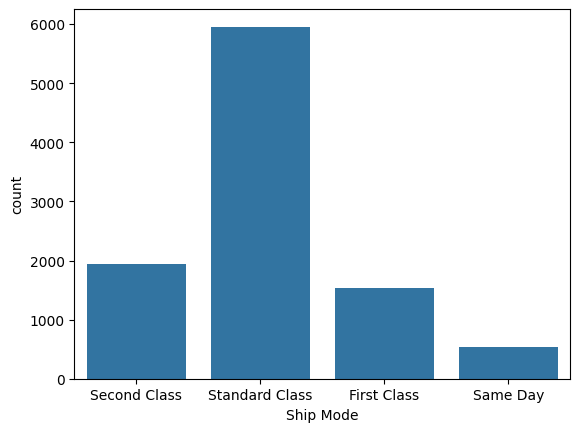

In [24]:
# Count plot of 'Ship Mode'
sns.countplot(x=df['Ship Mode'])

# Count of each 'Segment'
df['Segment'].value_counts()

<Axes: xlabel='Profit', ylabel='Density'>

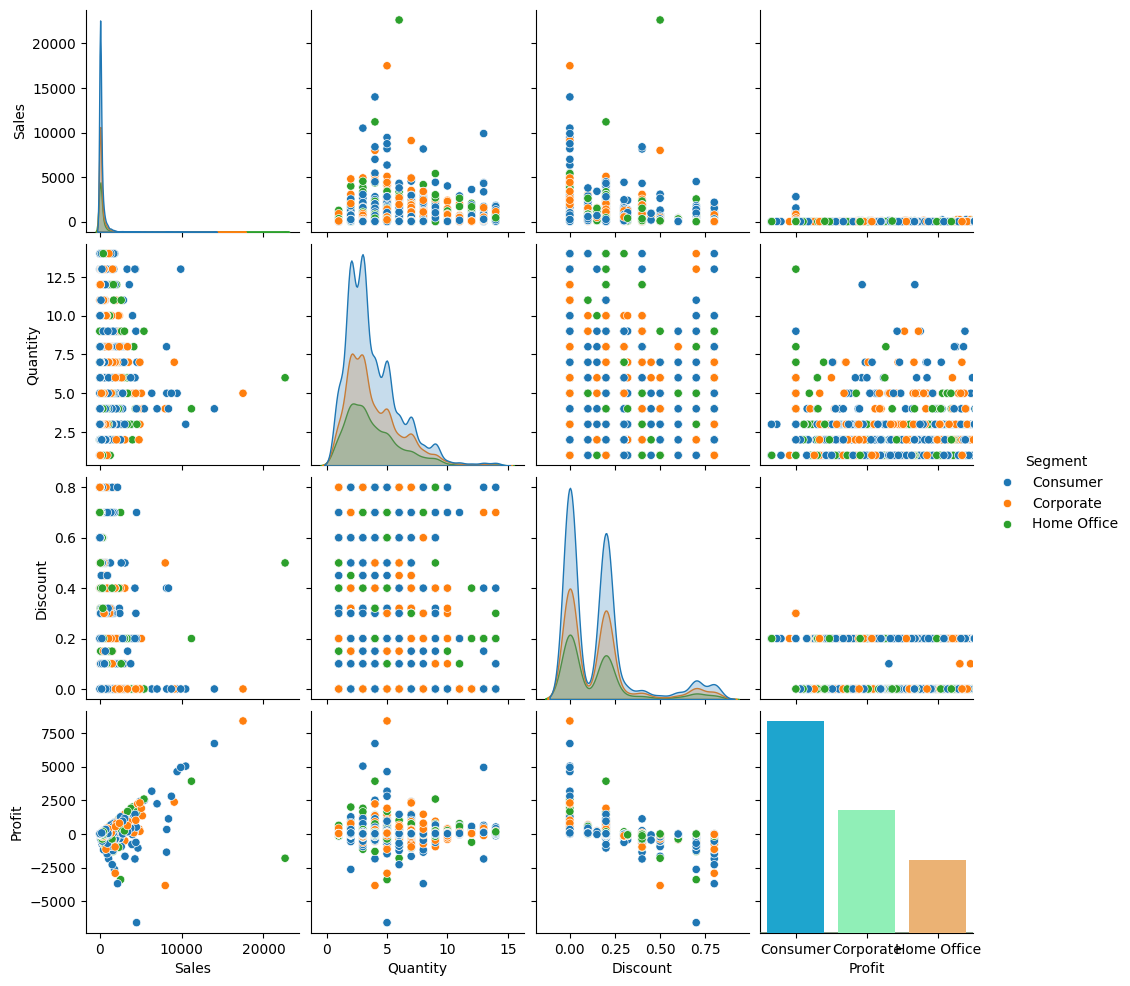

In [25]:
# Pair plot based on 'Segment'
sns.pairplot(df, hue='Segment')

# Count plot of 'Segment'
sns.countplot(x='Segment', data=df, palette='rainbow')

<Axes: xlabel='Category', ylabel='count'>

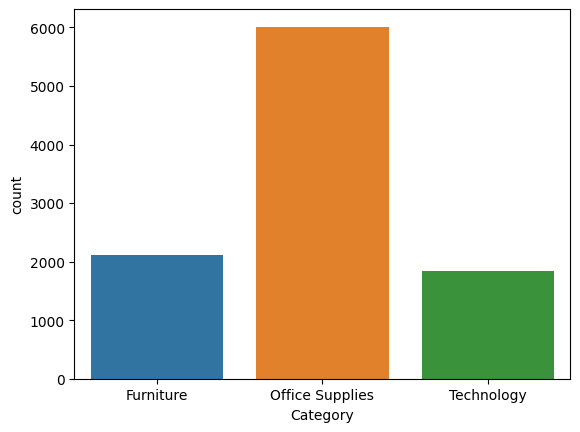

In [26]:
# Count of each 'Category'
df['Category'].value_counts()

# Count plot of 'Category'
sns.countplot(x='Category', data=df, palette='tab10')

,count
Sub-Category,
Binders,1522
Paper,1359
Furnishings,956
Phones,889
Storage,846
Art,795
Accessories,775
Chairs,615
Appliances,466


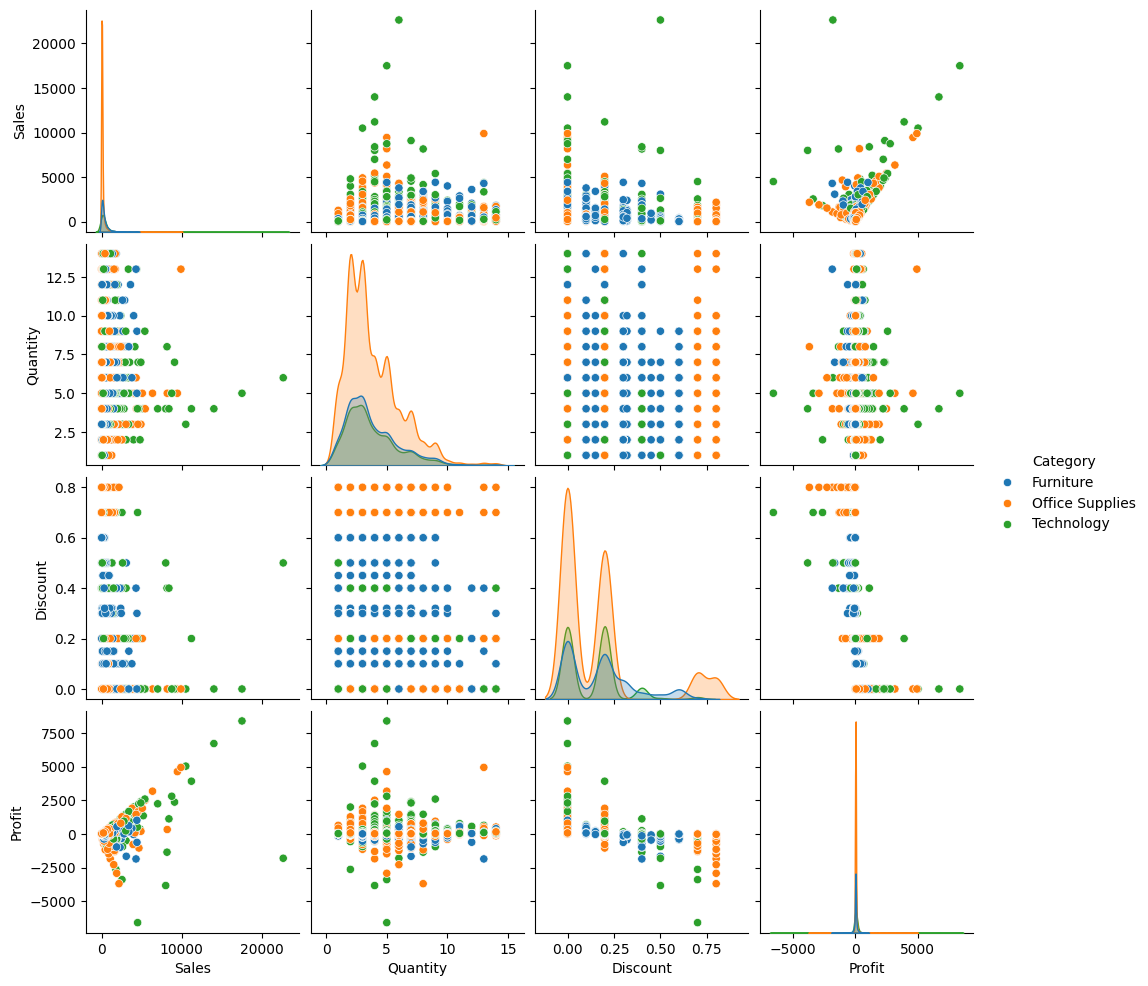

In [27]:
# Pair plot based on 'Category'
sns.pairplot(df, hue='Category')

# Count of each 'Sub-Category'
df['Sub-Category'].value_counts()

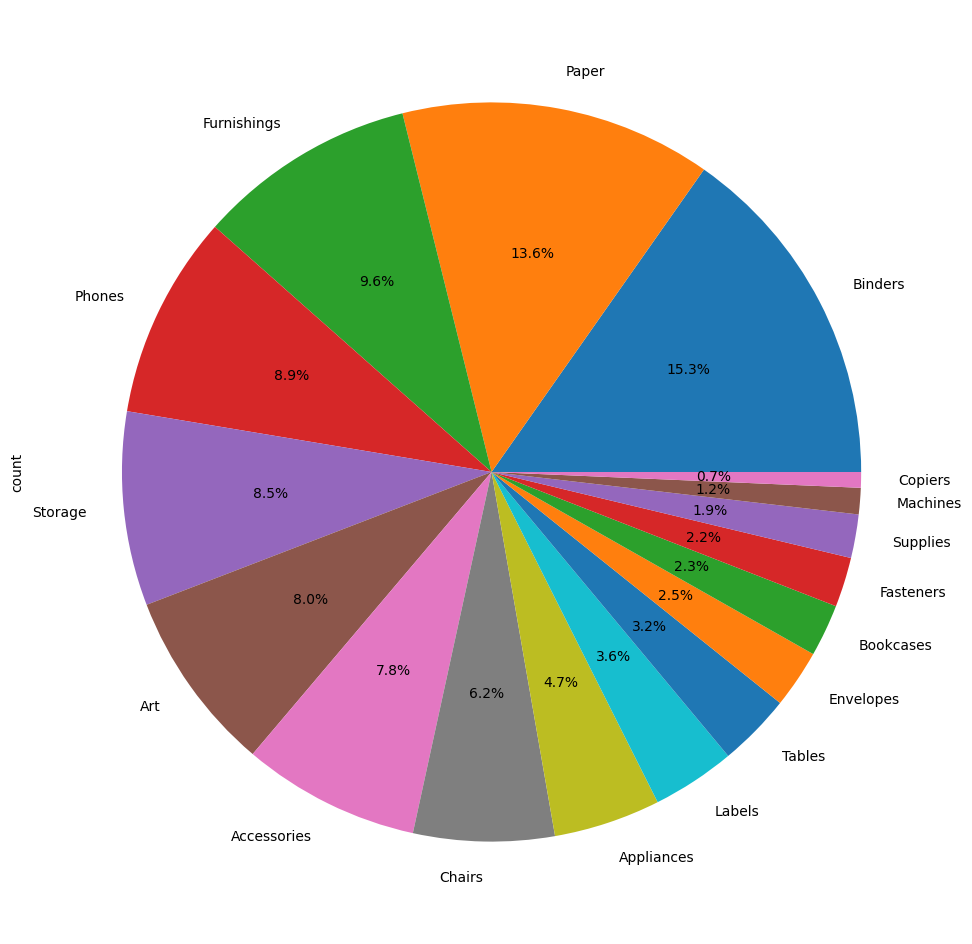

In [28]:
# Pie chart of 'Sub-Category'
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [29]:
# Observation 1:
# Maximum categories: Binders, Paper, Furnishings, Phones, Storage, Art, Accessories
# Minimum: Copiers, Machines, Suppliers

# Count of each 'State'
df['State'].value_counts()

,count
State,
California,1996
New York,1127
Texas,983
Pennsylvania,586
Washington,502
Illinois,491
Ohio,468
Florida,383
Michigan,254


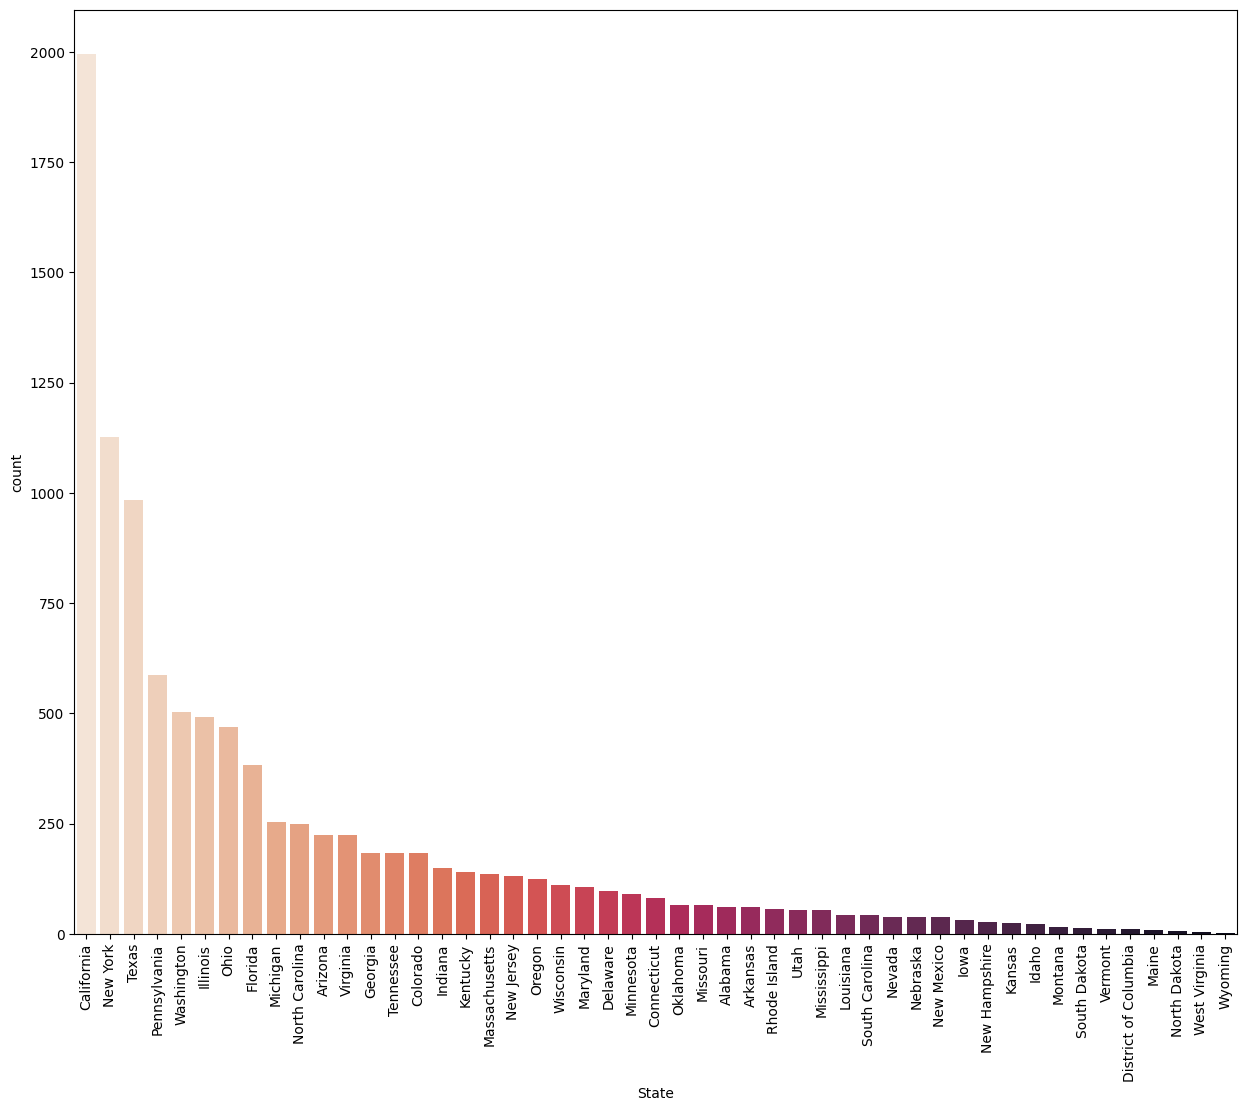

In [30]:
# Count plot of 'State'
plt.figure(figsize=(15,12))
sns.countplot(x='State', data=df, palette='rocket_r', order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

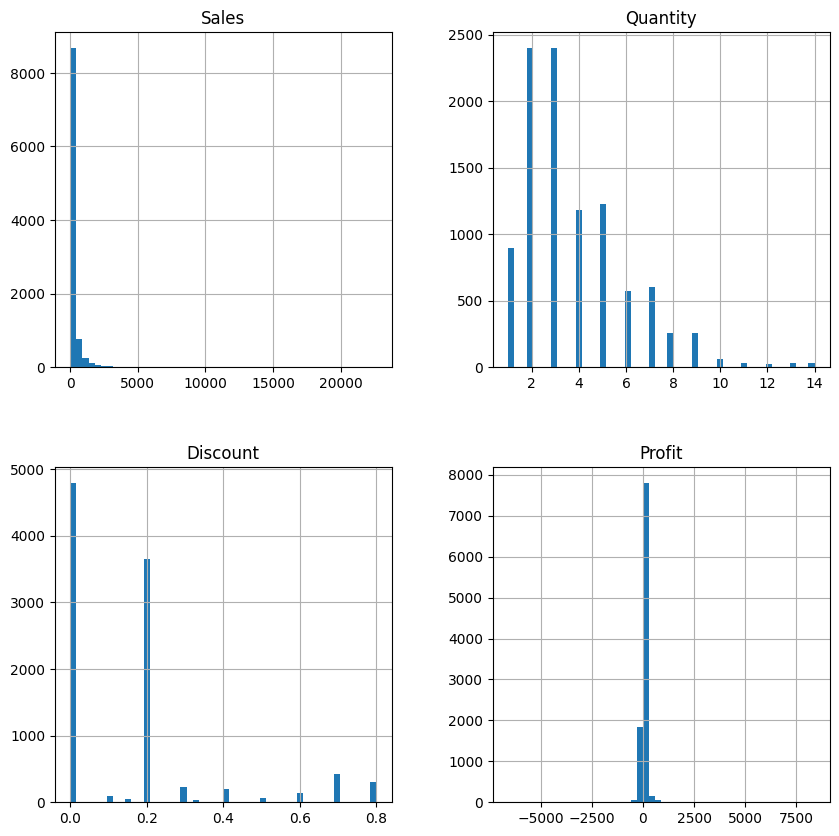

In [31]:

# Observation 2:
# Highest number of buyers are from California and New York

# Histogram for all numerical columns
df.hist(figsize=(10,10), bins=50)
plt.show()

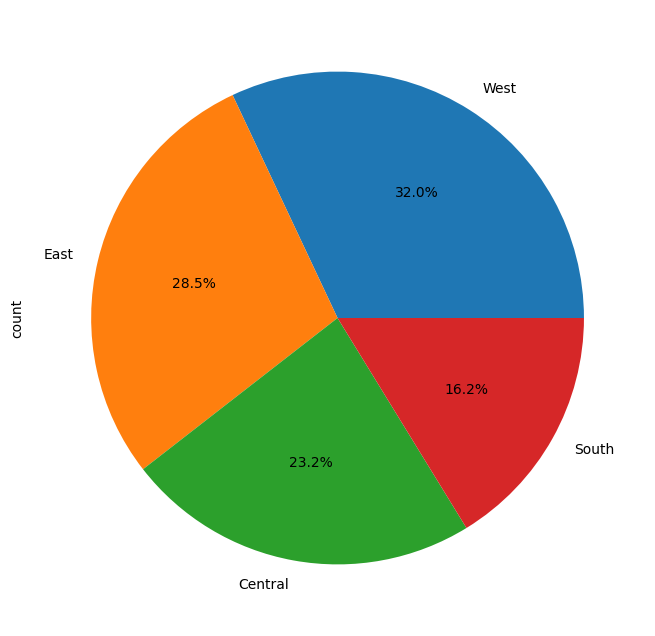

In [32]:
# Observation 3:
# - Most customers tend to buy quantities of 2 or 3
# - Discount offered is mostly 0 to 20%

# Pie chart for 'Region'
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()


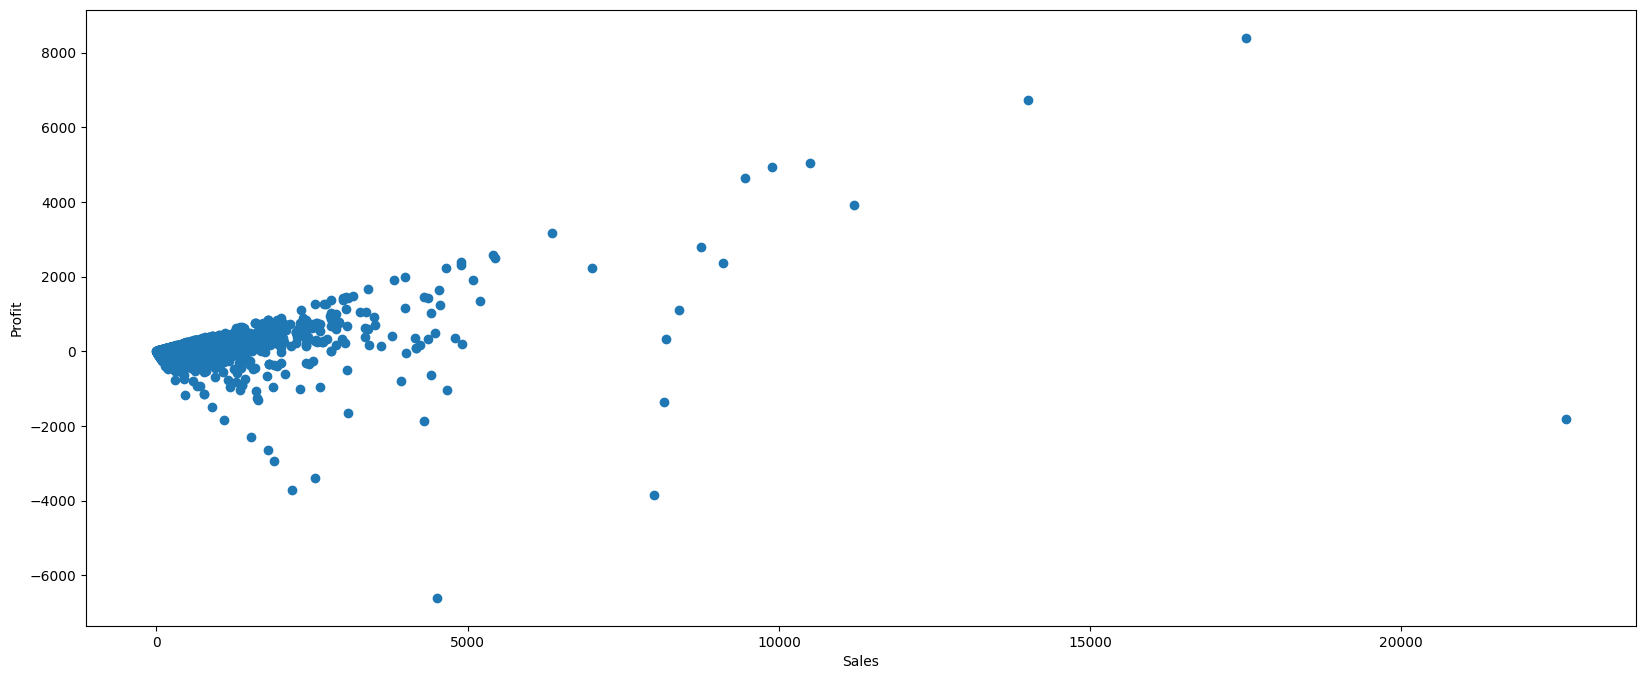

In [33]:
# Profit vs Sales scatter plot
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(df['Sales'], df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()


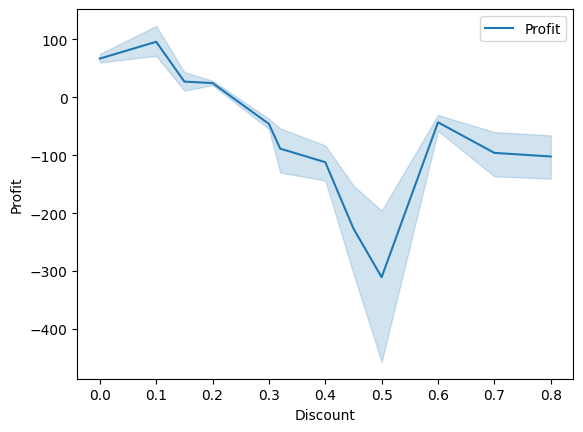

In [34]:
# Line plot: Profit vs Discount
sns.lineplot(x='Discount', y='Profit', label='Profit', data=df)
plt.legend()
plt.show()

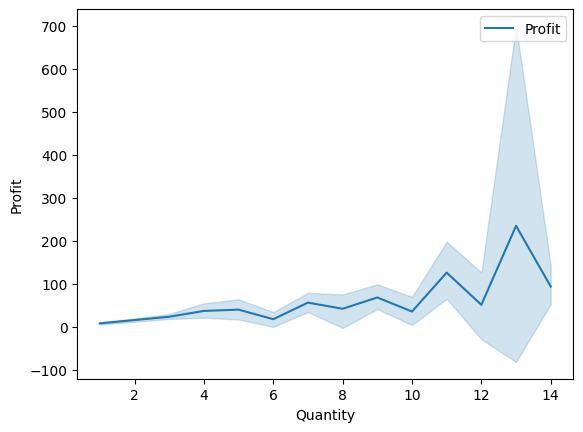

In [35]:
# Observation 4:
# No correlation between profit and discount

# Line plot: Profit vs Quantity
sns.lineplot(x='Quantity', y='Profit', label='Profit', data=df)
plt.legend()
plt.show()

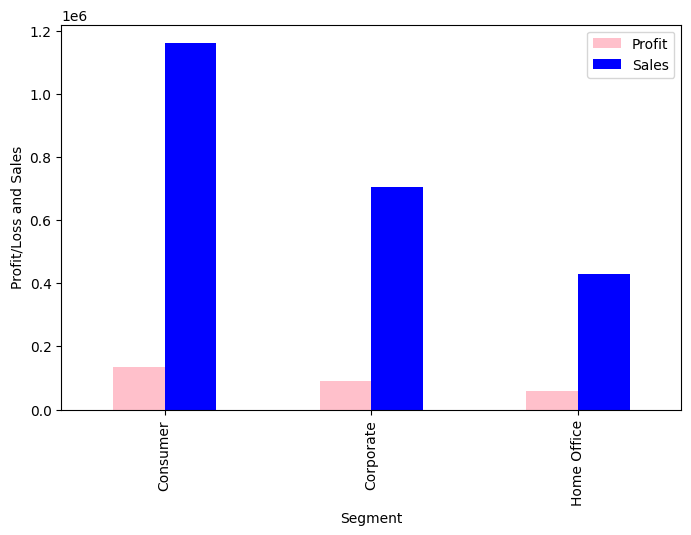

In [36]:
# Bar plot: Profit and Sales by 'Segment'
df.groupby('Segment')[['Profit', 'Sales']].sum().plot.bar(color=['pink', 'blue'], figsize=(8,5))
plt.ylabel('Profit/Loss and Sales')
plt.show()


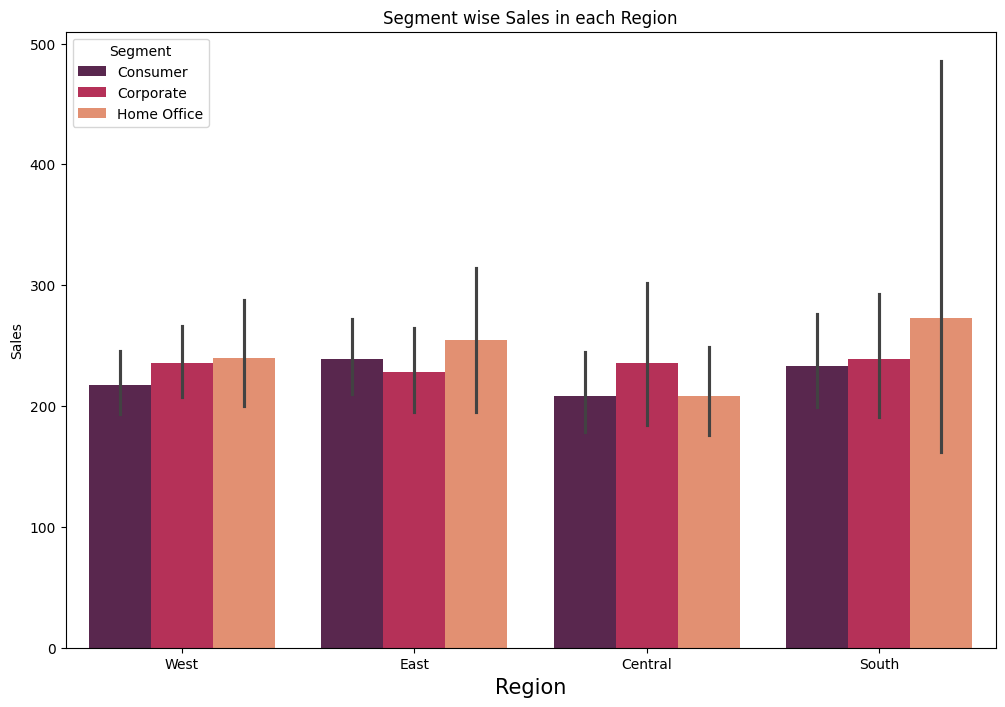

In [37]:
# Observation 5:
# Profit and sales are maximum in the Consumer segment and minimum in the Home Office segment

# Bar plot: Sales in each 'Region' by 'Segment'
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region', y='Sales', data=df, hue='Segment', order=df['Region'].value_counts().index, palette='rocket')
plt.xlabel('Region', fontsize=15)
plt.show()

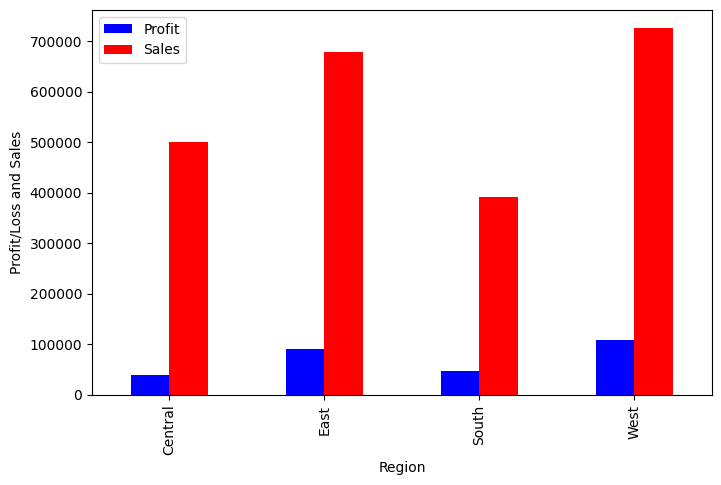

In [38]:
# Observation 6:
# Sales are similar across segments in every region

# Bar plot: Profit and Sales by 'Region'
df.groupby('Region')[['Profit', 'Sales']].sum().plot.bar(color=['blue', 'red'], figsize=(8,5))
plt.ylabel('Profit/Loss and Sales')
plt.show()

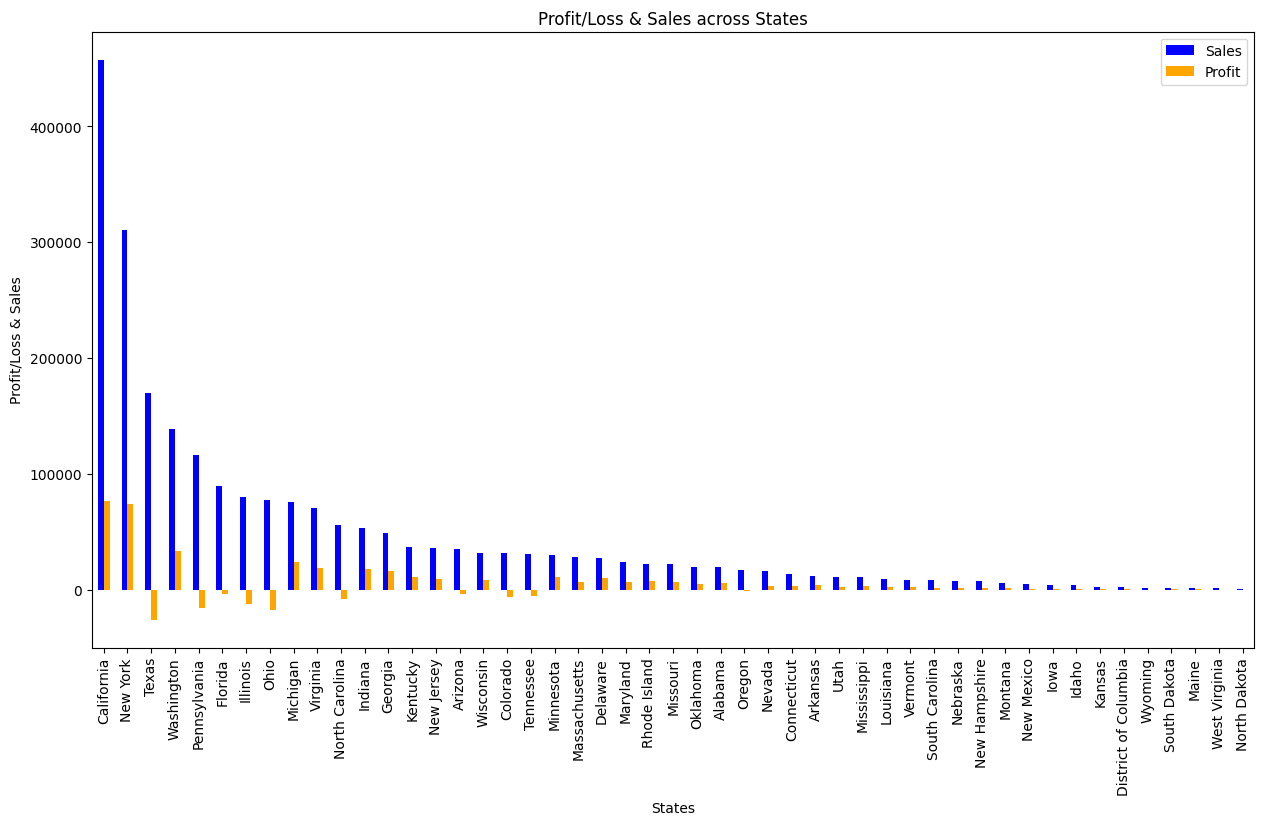

In [39]:
# Observation 7:
# Profit and sales are highest in the West region, lowest in the South region

# Bar plot: Profit and Sales by 'State'
ps = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
ps[:].plot.bar(color=['blue', 'orange'], figsize=(15,8))
plt.title('Profit/Loss & Sales across States')
plt.xlabel('States')
plt.ylabel('Profit/Loss & Sales')
plt.show()


In [40]:
# Observation 8:
# High profit in California and New York
# Loss in Texas, Pennsylvania, Ohio

# Top 10 states by count
t_states = df['State'].value_counts().nlargest(10)
t_states

,count
State,
California,1996
New York,1127
Texas,983
Pennsylvania,586
Washington,502
Illinois,491
Ohio,468
Florida,383
Michigan,254


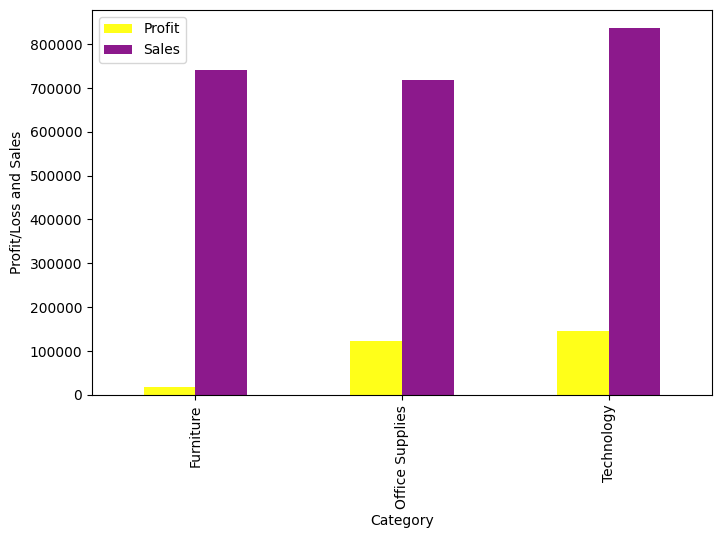

In [41]:
# Bar plot: Profit and Sales by 'Category'
df.groupby('Category')[['Profit', 'Sales']].sum().plot.bar(color=['yellow', 'purple'], alpha=0.9, figsize=(8,5))
plt.ylabel('Profit/Loss and Sales')
plt.show()

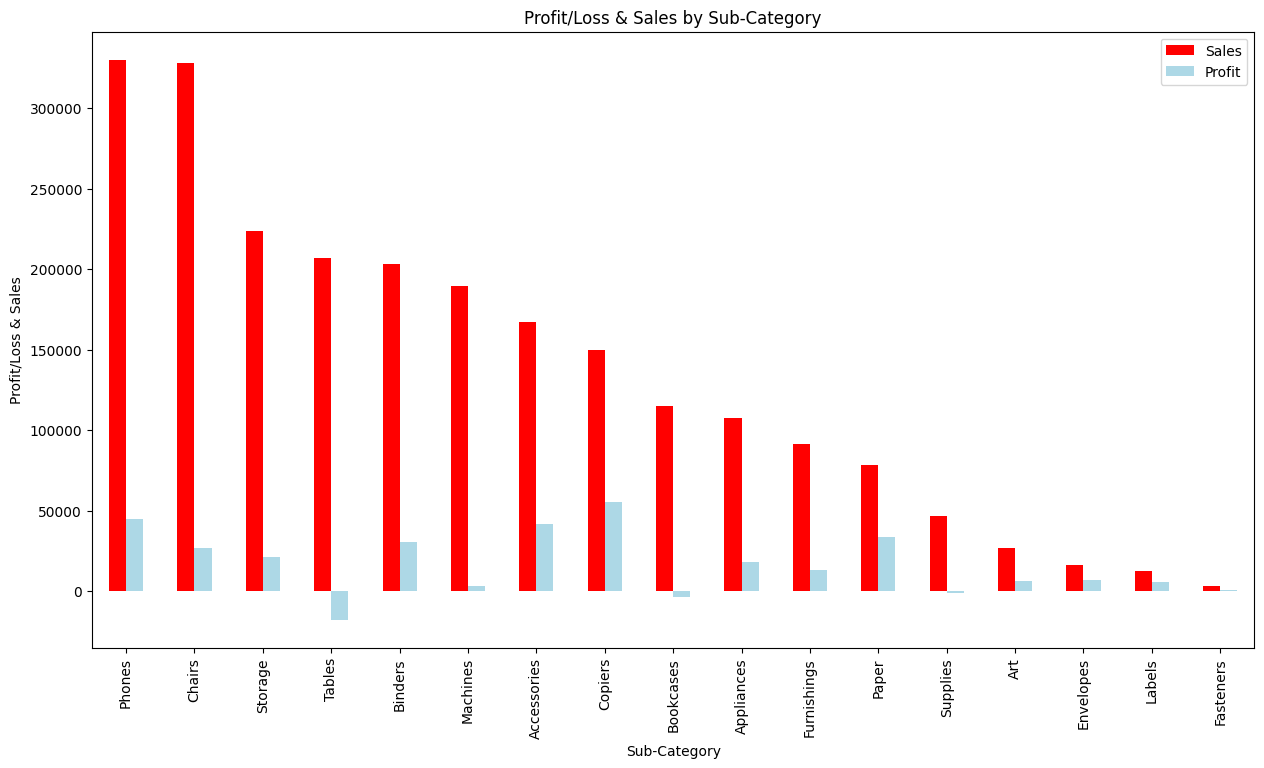

In [42]:

# Observation 9:
# Technology and Office Supplies have high profit, Furniture has lower profit

# Bar plot: Profit and Sales by 'Sub-Category'
ps = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
ps[:].plot.bar(color=['red', 'lightblue'], figsize=(15,8))
plt.title('Profit/Loss & Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/Loss & Sales')
plt.show()

In [ ]:
# Observation 10:
# Phones sub-category has high sales.
# Chairs have high sales but less profit compared to phones.
# Tables and Bookmarks sub-categories are facing losses.